<a href="https://colab.research.google.com/github/tumblingdice512/Research/blob/master/model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [500]:
import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [501]:
N = 10
L = 5

In [502]:
torch.manual_seed(100)

In [503]:
S0 = torch.sign(torch.randn(5,N))

SL = torch.sign(torch.randn(5,N))


M = S0.size()[0]
print(M)
print(N)
print(S0.shape)
print(S0[0].shape)

5
10
torch.Size([5, 10])
torch.Size([10])


In [504]:
alpha = M / N
print(alpha)

0.5


In [505]:
D = torch.Tensor([[1,2,3],[2,3,4]])
print(D)
print(D.shape)
print("M:",D.size()[0]) #M
print("N:",D.size()[1]) #N

tensor([[1., 2., 3.],
        [2., 3., 4.]])
torch.Size([2, 3])
M: 2
N: 3


In [506]:
def spin_overlap(x,y):
  spin_overlap = 0
  for i in range (len(x[0])) :

    spin_overlap = spin_overlap + torch.dot(x.T[i],y.T[i])
  return torch.abs(spin_overlap/(x.size()[0]*x.size()[1]))

print(spin_overlap(S0,S0))


tensor(1.)


In [507]:
def bond_overlap(x,y):
  bond_overlap = 0
  for i in range (len(x[0])) :

    bond_overlap = bond_overlap + torch.dot(x[i],y[i])
  return torch.abs(bond_overlap/(x.size()[0]*x.size()[1]))

#pytorchではネットワークで定義する重みの転置を計算に用いるので、行方向が同じパーセプトロンに対応

In [508]:
S_a = torch.Tensor([[1,-1],[-1,1],[1,-1]])
S_b = torch.Tensor([[1,-1],[1,1],[1,1]])
print(spin_overlap(S_a,S_b))
print(spin_overlap(S_a,S_a))

tensor(0.3333)
tensor(1.)


In [509]:
a1 = torch.dot(S_a.T[0],S_b.T[0])
a2 = torch.dot(S_a.T[1],S_b.T[1])
a3 = (a1 + a2)/(2*3)
print(a3)

tensor(0.3333)


In [510]:
def MSE(t, y):
    mse = torch.mean(torch.sum(torch.square(t-y),axis = 1),axis = 0)
    return mse

In [511]:
print(MSE(S0,SL))

tensor(18.4000)


In [512]:
A = torch.Tensor([[3,5,1],[4,12,1]])
print(A**2)
A_norm = (torch.sum(torch.square(A),axis=0))**(1/2)

A_normalized = A / A_norm
A_normalized_2 = A / A_norm * (N**(1/2))

print(A_norm)

print(A_normalized)
print(A_normalized_2)

tensor([[  9.,  25.,   1.],
        [ 16., 144.,   1.]])
tensor([ 5.0000, 13.0000,  1.4142])
tensor([[0.6000, 0.3846, 0.7071],
        [0.8000, 0.9231, 0.7071]])
tensor([[1.8974, 1.2163, 2.2361],
        [2.5298, 2.9190, 2.2361]])


In [513]:
def weight_norm(x):
    x_norm = (torch.sum(torch.square(x),axis=0)**(1/2))
    return x_norm

In [514]:
w_a = torch.Tensor([[1,0,1],[1,2,0],[0,1,0]]) 
w_b = torch.Tensor([[1,0,0],[0,1,0],[0,0,1]]) 
J_a = w_a / (weight_norm(w_a)) * (3**(1/2))
J_b = w_b / (weight_norm(w_b)) * (3**(1/2))


print(J_a)
print(J_b)
print(len(J_a[0]))

print(bond_overlap(J_a,J_b))
print(bond_overlap(J_a,J_a))

tensor([[1.2247, 0.0000, 1.7321],
        [1.2247, 1.5492, 0.0000],
        [0.0000, 0.7746, 0.0000]])
tensor([[1.7321, 0.0000, 0.0000],
        [0.0000, 1.7321, 0.0000],
        [0.0000, 0.0000, 1.7321]])
3
tensor(0.5338)
tensor(1.)


In [515]:
c = torch.nn.utils.weight_norm(torch.nn.Linear(4, 3, False), name='weight',dim=0)
#計算の際にはcの転置を用いる。正規化は、dim=0で行う必要あり。
print(c.weight)
print(c.weight_g)
d = c.weight/c.weight_g
print(d)
print(c.weight_v.size())

tensor([[-0.3121,  0.0534, -0.2318,  0.4556],
        [ 0.4761,  0.0934, -0.1876,  0.4431],
        [ 0.3519,  0.4815, -0.3868, -0.0217]], grad_fn=<MulBackward0>)
Parameter containing:
tensor([[0.6013],
        [0.6834],
        [0.7112]], requires_grad=True)
tensor([[-0.5190,  0.0888, -0.3856,  0.7577],
        [ 0.6967,  0.1366, -0.2745,  0.6485],
        [ 0.4948,  0.6771, -0.5439, -0.0305]], grad_fn=<DivBackward0>)
torch.Size([3, 4])


In [516]:
e = torch.nn.utils.weight_norm(torch.nn.Linear(4, 3, False), name='weight',dim=0)
print(e.weight)
print(e.weight_g)
x = torch.randn(2, 4)
print("x",x)
print("e(x)",e(x))
e.weight = e.weight/e.weight_g
print(e.weight)
print("3*e(x)",3*e(x))


tensor([[-0.0564, -0.1153, -0.0479,  0.0569],
        [ 0.4952, -0.4985, -0.4187, -0.0093],
        [-0.2870, -0.0397, -0.3614, -0.4723]], grad_fn=<MulBackward0>)
Parameter containing:
tensor([[0.1483],
        [0.8180],
        [0.6615]], requires_grad=True)
x tensor([[-0.7347, -0.1396,  0.2408, -0.5533],
        [-2.0483,  1.1918,  0.8283,  0.1775]])
e(x) tensor([[ 0.0145, -0.3900,  0.3907],
        [-0.0515, -1.9569,  0.1574]], grad_fn=<MmBackward>)
tensor([[-0.3800, -0.7773, -0.3231,  0.3834],
        [ 0.6054, -0.6094, -0.5119, -0.0113],
        [-0.4339, -0.0600, -0.5463, -0.7140]], grad_fn=<DivBackward0>)
3*e(x) tensor([[ 0.0435, -1.1700,  1.1721],
        [-0.1546, -5.8708,  0.4722]], grad_fn=<MulBackward0>)


In [517]:
class Network1(torch.nn.Module):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc1_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc2_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc3_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc4_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc5_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)

        
    def forward(self, x):
        x = torch.tanh(N**(1/2)*self.fc1_1(x))
        S1_1 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc2_1(x))
        S2_1 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc3_1(x))
        S3_1 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc4_1(x))
        S4_1 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc5_1(x))
        S5_1 = torch.sign(x)

        return x, S1_1, S2_1, S3_1, S4_1, S5_1, self.fc1_1, self.fc2_1, self.fc3_1, self.fc4_1, self.fc5_1, self.fc1_1.weight_g, self.fc2_1.weight_g, self.fc3_1.weight_g, self.fc4_1.weight_g, self.fc5_1.weight_g



In [518]:
class Network2(torch.nn.Module):
    def __init__(self):
        super(Network2, self).__init__()
        self.fc1_2 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc2_2 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc3_2 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc4_2 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc5_2 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)

        

        
    def forward(self, x):

        x = torch.tanh(N**(1/2)*self.fc1_2(x))
        S1_2 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc2_2(x))
        S2_2 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc3_2(x))
        S3_2 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc4_2(x))
        S4_2 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc5_2(x))
        S5_2 = torch.sign(x)

        return x, S1_2, S2_2, S3_2, S4_2, S5_2, self.fc1_2, self.fc2_2, self.fc3_2, self.fc4_2, self.fc5_2, self.fc1_2.weight_g, self.fc2_2.weight_g, self.fc3_2.weight_g, self.fc4_2.weight_g, self.fc5_2.weight_g



In [519]:
class Network3(torch.nn.Module):
    def __init__(self):
        super(Network3, self).__init__()
        self.fc1_3 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc2_3 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc3_3 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc4_3 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc5_3 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)

        

        
    def forward(self, x):

        x = torch.tanh(N**(1/2)*self.fc1_3(x))
        S1_3 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc2_3(x))
        S2_3 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc3_3(x))
        S3_3 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc4_3(x))
        S4_3 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc5_3(x))
        S5_3 = torch.sign(x)

        return x, S1_3, S2_3, S3_3, S4_3, S5_3, self.fc1_3, self.fc2_3, self.fc3_3, self.fc4_3, self.fc5_3, self.fc1_3.weight_g, self.fc2_3.weight_g, self.fc3_3.weight_g, self.fc4_3.weight_g, self.fc5_3.weight_g



In [520]:
class Network4(torch.nn.Module):
    def __init__(self):
        super(Network4, self).__init__()
        self.fc1_4 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc2_4 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc3_4 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc4_4 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc5_4 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)

        

        
    def forward(self, x):

        x = torch.tanh(N**(1/2)*self.fc1_4(x))
        S1_4 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc2_4(x))
        S2_4 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc3_4(x))
        S3_4 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc4_4(x))
        S4_4 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc5_4(x))
        S5_4 = torch.sign(x)

        return x, S1_4, S2_4, S3_4, S4_4, S5_4, self.fc1_4, self.fc2_4, self.fc3_4, self.fc4_4, self.fc5_4, self.fc1_4.weight_g, self.fc2_4.weight_g, self.fc3_4.weight_g, self.fc4_4.weight_g, self.fc5_4.weight_g



In [521]:
class Network5(torch.nn.Module):
    def __init__(self):
        super(Network5, self).__init__()
        self.fc1_5 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc2_5 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc3_5 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc4_5 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc5_5 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)

        

        
    def forward(self, x):

        x = torch.tanh(N**(1/2)*self.fc1_5(x))
        S1_5 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc2_5(x))
        S2_5 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc3_5(x))
        S3_5 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc4_5(x))
        S4_5 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc5_5(x))
        S5_5 = torch.sign(x)

        return x, S1_5, S2_5, S3_5, S4_5, S5_5, self.fc1_5, self.fc2_5, self.fc3_5, self.fc4_5, self.fc5_5, self.fc1_5.weight_g, self.fc2_5.weight_g, self.fc3_5.weight_g, self.fc4_5.weight_g, self.fc5_5.weight_g



In [522]:
class Network6(torch.nn.Module):
    def __init__(self):
        super(Network6, self).__init__()
        self.fc1_6 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc2_6 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc3_6 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc4_6 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc5_6 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)

        

        
    def forward(self, x):

        x = torch.tanh(N**(1/2)*self.fc1_6(x))
        S1_6 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc2_6(x))
        S2_6 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc3_6(x))
        S3_6 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc4_6(x))
        S4_6 = torch.sign(x)
        x = torch.tanh(N**(1/2)*self.fc5_6(x))
        S5_6 = torch.sign(x)

        return x, S1_6, S2_6, S3_6, S4_6, S5_6, self.fc1_6, self.fc2_6, self.fc3_6, self.fc4_6, self.fc5_6, self.fc1_6.weight_g, self.fc2_6.weight_g, self.fc3_6.weight_g, self.fc4_6.weight_g, self.fc5_6.weight_g



In [524]:
if __name__ == '__main__':
    # 学習回数
    n_epoch = 20000
 
    # 学習結果の保存用
    history_1 = {'train_loss_1': []}

    history_2 = {'train_loss_2': []}

    history_3 = {'train_loss_3': []}

    history_4 = {'train_loss_4': []}

    history_5 = {'train_loss_5': []}

    history_6 = {'train_loss_6': []}
 
    # ネットワークを構築
    net_1: torch.nn.Module = Network1()
    net_2: torch.nn.Module = Network2()
    net_3: torch.nn.Module = Network3()
    net_4: torch.nn.Module = Network4()
    net_5: torch.nn.Module = Network5()
    net_6: torch.nn.Module = Network6()
    
    optimizer_1 = torch.optim.SGD(params=net_1.parameters(), lr=0.05)
    optimizer_2 = torch.optim.SGD(params=net_2.parameters(), lr=0.05)
    optimizer_3 = torch.optim.SGD(params=net_3.parameters(), lr=0.05)
    optimizer_4 = torch.optim.SGD(params=net_4.parameters(), lr=0.05)
    optimizer_5 = torch.optim.SGD(params=net_5.parameters(), lr=0.05)
    optimizer_6 = torch.optim.SGD(params=net_6.parameters(), lr=0.05)

    for n in range(n_epoch):
 
        """ Training Part"""
        loss = None
        # 学習フェーズ
        net_1.train(True)  # 引数は省略可能
        net_2.train(True)
        net_3.train(True)
        net_4.train(True)
        net_5.train(True)
        net_6.train(True)
        
 
        optimizer_1.zero_grad()
        optimizer_2.zero_grad()
        optimizer_3.zero_grad()
        optimizer_4.zero_grad()
        optimizer_5.zero_grad()
        optimizer_6.zero_grad()

        output_1 = net_1(S0)
        output_2 = net_2(S0)
        output_3 = net_3(S0)
        output_4 = net_4(S0)
        output_5 = net_5(S0)
        output_6 = net_6(S0)

        loss_1 = MSE(output_1[0], SL)
        loss_2 = MSE(output_2[0], SL)
        loss_3 = MSE(output_3[0], SL)
        loss_4 = MSE(output_4[0], SL)
        loss_5 = MSE(output_5[0], SL)
        loss_6 = MSE(output_6[0], SL)

        loss_1.backward()
        loss_2.backward()
        loss_3.backward()
        loss_4.backward()
        loss_5.backward()
        loss_6.backward()

        optimizer_1.step()
        optimizer_2.step()
        optimizer_3.step()
        optimizer_4.step()
        optimizer_5.step()
        optimizer_6.step()
 
        print('EPOCH ', n + 1, ' | train_loss_1 ',loss_1, ' | train_loss_2 ',loss_2, ' | train_loss_3 ',loss_3
              , ' | train_loss_4 ',loss_4, ' | train_loss_5 ',loss_5, ' | train_loss_6 ',loss_6)
        
 
        history_1['train_loss_1'].append(loss_1)
        history_2['train_loss_2'].append(loss_2)
        history_3['train_loss_3'].append(loss_3)
        history_4['train_loss_4'].append(loss_4)
        history_5['train_loss_5'].append(loss_5)
        history_6['train_loss_6'].append(loss_6)

ストリーミング出力は最後の 5000 行に切り捨てられました。
EPOCH  15001  | train_loss_1  tensor(5.5552e-05, grad_fn=<MeanBackward1>)  | train_loss_2  tensor(4.8554e-05, grad_fn=<MeanBackward1>)  | train_loss_3  tensor(5.8416e-05, grad_fn=<MeanBackward1>)  | train_loss_4  tensor(4.4153e-05, grad_fn=<MeanBackward1>)  | train_loss_5  tensor(5.3053e-05, grad_fn=<MeanBackward1>)  | train_loss_6  tensor(5.3692e-05, grad_fn=<MeanBackward1>)
EPOCH  15002  | train_loss_1  tensor(5.5548e-05, grad_fn=<MeanBackward1>)  | train_loss_2  tensor(4.8551e-05, grad_fn=<MeanBackward1>)  | train_loss_3  tensor(5.8412e-05, grad_fn=<MeanBackward1>)  | train_loss_4  tensor(4.4150e-05, grad_fn=<MeanBackward1>)  | train_loss_5  tensor(5.3050e-05, grad_fn=<MeanBackward1>)  | train_loss_6  tensor(5.3688e-05, grad_fn=<MeanBackward1>)
EPOCH  15003  | train_loss_1  tensor(5.5544e-05, grad_fn=<MeanBackward1>)  | train_loss_2  tensor(4.8547e-05, grad_fn=<MeanBackward1>)  | train_loss_3  tensor(5.8408e-05, grad_fn=<MeanBackward1>)  | train_loss_

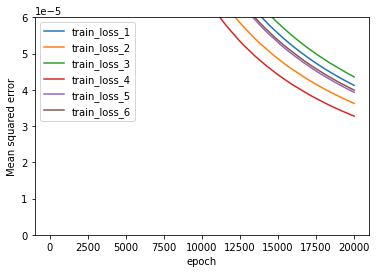

In [528]:
# 結果の出力と描画
plt.figure()
plt.plot(range(1, n_epoch+1), history_1['train_loss_1'], label='train_loss_1')
plt.plot(range(1, n_epoch+1), history_2['train_loss_2'], label='train_loss_2')
plt.plot(range(1, n_epoch+1), history_3['train_loss_3'], label='train_loss_3')
plt.plot(range(1, n_epoch+1), history_4['train_loss_4'], label='train_loss_4')
plt.plot(range(1, n_epoch+1), history_5['train_loss_5'], label='train_loss_5')
plt.plot(range(1, n_epoch+1), history_6['train_loss_6'], label='train_loss_6')
plt.xlabel('epoch')
plt.ylabel('Mean squared error')
plt.legend()
plt.yscale("log")
plt.savefig('loss.png')



In [529]:
print(spin_overlap(output_1[5], SL))
print(spin_overlap(output_2[5], SL))
print(spin_overlap(output_3[5], SL))
print(spin_overlap(output_4[5], SL))
print(spin_overlap(output_5[5], SL))

tensor(1., grad_fn=<AbsBackward>)
tensor(1., grad_fn=<AbsBackward>)
tensor(1., grad_fn=<AbsBackward>)
tensor(1., grad_fn=<AbsBackward>)
tensor(1., grad_fn=<AbsBackward>)


In [530]:
J1_1 = N**(1/2) * output_1[6].weight/output_1[11]
J2_1 = N**(1/2) * output_1[7].weight/output_1[12]
J3_1 = N**(1/2) * output_1[8].weight/output_1[13]
J4_1 = N**(1/2) * output_1[9].weight/output_1[14]
J5_1 = N**(1/2) * output_1[10].weight/output_1[15]

S1_1 = output_1[1]
S2_1 = output_1[2]
S3_1 = output_1[3]
S4_1 = output_1[4]
S5_1 = output_1[5]



In [531]:
J1_2 = N**(1/2) * output_2[6].weight/output_2[11]
J2_2 = N**(1/2) * output_2[7].weight/output_2[12]
J3_2 = N**(1/2) * output_2[8].weight/output_2[13]
J4_2 = N**(1/2) * output_2[9].weight/output_2[14]
J5_2 = N**(1/2) * output_2[10].weight/output_2[15]

S1_2 = output_2[1]
S2_2 = output_2[2]
S3_2 = output_2[3]
S4_2 = output_2[4]
S5_2 = output_2[5]

In [532]:
J1_3 = N**(1/2) * output_3[6].weight/output_3[11]
J2_3 = N**(1/2) * output_3[7].weight/output_3[12]
J3_3 = N**(1/2) * output_3[8].weight/output_3[13]
J4_3 = N**(1/2) * output_3[9].weight/output_3[14]
J5_3 = N**(1/2) * output_3[10].weight/output_3[15]

S1_3 = output_3[1]
S2_3 = output_3[2]
S3_3 = output_3[3]
S4_3 = output_3[4]
S5_3 = output_3[5]

In [533]:
J1_4 = N**(1/2) * output_4[6].weight/output_4[11]
J2_4 = N**(1/2) * output_4[7].weight/output_4[12]
J3_4 = N**(1/2) * output_4[8].weight/output_4[13]
J4_4 = N**(1/2) * output_4[9].weight/output_4[14]
J5_4 = N**(1/2) * output_4[10].weight/output_4[15]

S1_4 = output_4[1]
S2_4 = output_4[2]
S3_4 = output_4[3]
S4_4 = output_4[4]
S5_4 = output_4[5]

In [534]:
J1_5 = N**(1/2) * output_5[6].weight/output_5[11]
J2_5 = N**(1/2) * output_5[7].weight/output_5[12]
J3_5 = N**(1/2) * output_5[8].weight/output_5[13]
J4_5 = N**(1/2) * output_5[9].weight/output_5[14]
J5_5 = N**(1/2) * output_5[10].weight/output_5[15]

S1_5 = output_5[1]
S2_5 = output_5[2]
S3_5 = output_5[3]
S4_5 = output_5[4]
S5_5 = output_5[5]

In [535]:
J1_6 = N**(1/2) * output_6[6].weight/output_6[11]
J2_6 = N**(1/2) * output_6[7].weight/output_6[12]
J3_6 = N**(1/2) * output_6[8].weight/output_6[13]
J4_6 = N**(1/2) * output_6[9].weight/output_6[14]
J5_6 = N**(1/2) * output_6[10].weight/output_6[15]

S1_6 = output_6[1]
S2_6 = output_6[2]
S3_6 = output_6[3]
S4_6 = output_6[4]
S5_6 = output_6[5]